# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [28]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as st
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

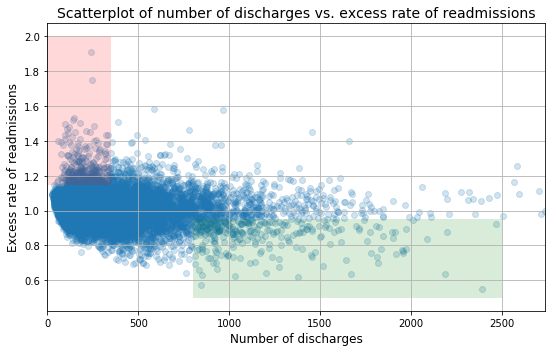

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. I do not agree with the analysis. The overall negative correlation is not strong and could be influenced by a few outliers in the sample, and there are a much greater number of small hospitals that fall below the red area than those that are above. Similarly, the green area represents a very small portion of the data and overexaggerates the supposed lower excess readmission rate for large hospitals. 

The p-value from our hypothesis test for correlation is 0.0


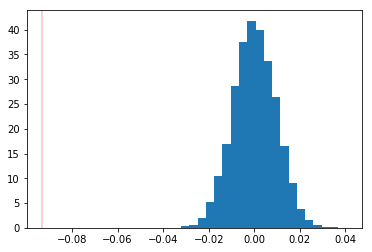

In [22]:
# 2. Compute and report the observed significance value (or p-value)
np.random.seed(7209)

num_discharges = clean_hospital_read_df['Number of Discharges'][81:-3]
excess_readmissions_rt = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
r_obs = np.corrcoef(num_discharges, excess_readmissions_rt)[0,1]
perm_reps = np.empty(10000)
for i in range(10000):
    num_discharges_perm = np.random.permutation(num_discharges)
    perm_reps[i] = np.corrcoef(num_discharges_perm, excess_readmissions_rt)[0,1]
_ = plt.hist(perm_reps, bins=20, normed=True)
_ = plt.axvline(x=r_obs, color='pink')
p_val = np.sum(perm_reps <= r_obs) / len(perm_reps)
print('The p-value from our hypothesis test for correlation is', p_val)

3. At the 99% significance level, we can reject the null hypothesis that the number of discharges and excess readmission rate are not correlated. This means that the correlation between the number of discharges and excess readmission rate found in the sample may be statistically significant. 

4. Although our sample correlation was found to be strongly statistically significant from our hypothesis test, the practical significance of this sample may not be strong. The sample correlation's value was relatively low at about -0.0931, and there are a few outliers (specifically, the two points that have excess readmission rates > 1.6) that may be influencing this already low negative correlation to be higher than it may be for the general US hospital population. My recommendation to the client would be to be wary about enacting any sort of nation-wide policy using this sample, simply because of the sample correlation's statistical signficance.

5. The plot's advantages include easy visibility and brings attention to the areas of the plot that display its overall negative trend; the lines coming from both axes make the data clearer and easier to read.  
It's disadvantages include a simplification of the data to two areas that ignore a large chunk of the data, and these areas may also be susceptible to outliers; the boxes overexaggerate the negative trend of the data. 

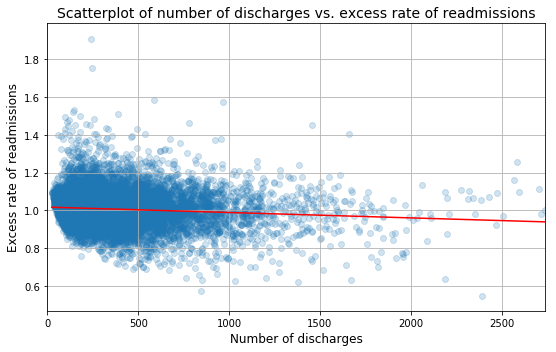

In [31]:
# Construct another plot that conveys the same information in a more direct manner
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

ax.grid(True)
fig.tight_layout()